<h1><center>Einführung in die Neuroinformatik - Übungsblatt 6</center></h1>
<h2><center>Dominik Authaler, Marco Deuscher und Carolin Schindler</center></h2>
<h2><center>Gruppe Q</center></h2>
<h2><center>Juni 2019</center></h2>


# Aufgabe 1: Cross Entropy
## Teilaufgabe 1:
Die skalare Fehlerfunktion und die Verwendung von nur einem skaleren Ausgabewerte $y_\mu$ ist in diesem Fall nicht geeignet. Für die erste Aufgabe Eingabe $x_1$ produziert das Netz einen Fehler von $(3-1)^2 = 4$. Im Anschluss werden die Gewichte und der Bias verändert woraufhin das Netz für eine erneute Eingabe von einem Element aus Klasse 1 den folgenden Fehler macht: $(2-1)^2 = 1$. Man könnte nun darauf schließen, dass die Klassifiktion beim zweiten Mal besser war, allerdings ist es genauso falsch eine Element von Klasse 1 als Klasse 2 zu klassifizieren, wie ein Element aus Klasse 1 als Klasse 3 zu klassifizieren. Dies spiegelt sich nicht im Fehler wieder. Daher ist er hier nicht geeignet.

## Teilaufgabe 3:
Es gilt $A(x_1,x_2,x_3,x_4) = (\frac{1}{8},\frac{1}{2},\frac{1}{4},\frac{1}{8})$ und $B(x_1,x_2,x_3,x_4) = (\frac{1}{2},\frac{1}{4},\frac{1}{8},\frac{1}{8})$. Für die Entropie gilt in beiden Fällen $H(A) = H(B) = 1,75$.  
### (a)
Berechnung der Cross-Entropy für Alice  
$H_A(B) = \frac{1}{8} + \frac{1}{2}* 2 + \frac{1}{4} * 3 + \frac{1}{8} * 3 = 2,25$
### (b)
Berechnung der Cross-Entropy für Bob
$H_B(A) = \frac{1}{2} * \log_{2}8 + \frac{1}{4} * \log_{2}2 + \frac{1}{8} * \log_{2}4 + \frac{1}{8} * \log_{2}8 = \frac{3}{2} +\frac{1}{4} + \frac{1}{4} + \frac{3}{8} = 2.375$

### (c)
Man sieht leicht dass $H_B(B) = H(B) = 1,75$

### (d)
Allg. gilt $D_Q(P) = H_Q(P) - H(P)$    
$D_A(B) = H_A(B) - H(B) = 2,25 - 1,75 = 0,5$  
$D_B(A) = H_B(A) - H(A) = 2,375 - 1,75 = 0,625$  
$D_B(B) = H_B(B) - H(B) = 0$  

## Teilaufgabe 4: 
### (I) $d_Q(P) \ge 0$ für alle $Q,P \in X$
Allg. gilt $D_Q(P) = H_Q(P) - H(P)$  
Außerdem ist bekannt, dass das Minimum bei $H_P(P)$ liegt  
Also gilt $H_Q(P) \ge H_P(P) = H(P)$ und $H(P) = \sum_x P(X) \log_{2}\frac{1}{P(x)} \ge 0$  
da $P(X)\ge 0$ und $P(x) \le 1$ und damit $\log_{2}\frac{1}{P(x)} \ge 0$ folgt die Aussage.

### (II)
Wurde bereits oben ausgerechnet und gezeigt, dass die beiden ungleich sind.

### (III) $d_Q(Q) = 0$
$d_Q(Q) = H_Q(Q) - H(Q) = \sum_x Q(X) \log_{2}\frac{1}{Q(x)} -\sum_x Q(X) \log_{2}\frac{1}{Q(x)} = 0 $


## Teilaufgabe 5:
### (a) 
Es gilt $C_t(x_1,x_2,x_3,x_4) = (t*\frac{3}{4},(1-t)\frac{3}{4},\frac{1}{8},\frac{1}{8})$ mit $t\in[0,1]$.  
Es wird eine Minimum erwartet wenn Charles Werte mit denen von Bob übereinstimmen, dies ist für $t = \frac{2}{3}$ der Fall, da $\frac{3t}{4} = \frac{1}{2}$ und $(1-t)\frac{3}{4} = \frac{1}{4}$ $\rightarrow t = \frac{2}{3}$

### (b)

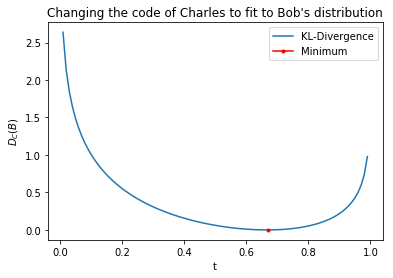

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Kullback_Leibler_Divergenz(C,B):
    #log(1/A) = -log(A)
    return  np.dot(np.log2(B),B) - np.dot(np.log2(C),B)

def c(t):
    return np.array([t*0.75,(1-t)*0.75,0.125,0.125])

tstart = 0.01
dt = 0.01
tende = 1

bob = np.array([0.5,0.25,0.125,0.125])
tValues = np.arange(tstart,tende,dt)

KLdivergences = np.zeros(len(tValues))
for i in range(len(tValues)):
    KLdivergences[i] = Kullback_Leibler_Divergenz(c(tValues[i]),bob)

#Get min and minindex
min_index = np.argmin(KLdivergences)
minimum = np.min(KLdivergences)
    
plt.plot(tValues,KLdivergences,label="KL-Divergence")
pl = plt.title("Changing the code of Charles to fit to Bob's distribution")
plt.xlabel("t");plt.ylabel(r'$D_C(B)$')


plt.plot(tValues[min_index], minimum, marker='o', markersize=3, color="red",label="Minimum")

plt.legend()


# Aufgabe 2: Cross Entropy als Kostenfunktion
1.)  
Die Softmax Funktion ist definiert als: $y_i = \frac{e^{c \cdot u_i}}{\sum_{j = 1}^{n}e^{c \cdot u_i}}$, für $c \in \mathbb{R}$ und $u_i = w_i \cdot x + b_i$.  
a) Zu zeigen ist nun, dass diese Funktion eine gültige, diskrete Wahrscheinlichkeitsverteilung darstellt, d.h. das $\forall i: (y_i \geq 0)$ und $\sum_{i=1}^{n}y_i = 1$.
Da für die Exponentialfunktion $\forall x: e^x > 0$ gilt, ist ersteres sehr schnell gezeigt. Der Zähler ist lediglich eine Exponentialfunktion und daher immer positiv, für den Nenner gilt das Argument als Summe von Exponentialfunktionen analog. 
Auch die zweite Bedingung kann relativ schnell gezeigt werden. Die entscheidenen Umformung ist dabei erlaubt, da der Nenner des Bruchs für alle Terme der äußeren Summe identisch ist:
$\sum_{i=1}^{n}y_i = \sum_{i=1}^{n}\frac{e^{c \cdot u_i}}{\sum_{j=1}^{n}e^{c \cdot u_j}}$
  
b) Zu zeigen: $y_1 = \frac{1}{1 + e^{c \cdot (u_2 - u_2)} + e^{c \cdot (u_3-u_1)}}$
$$
\begin{align*}
    y_1 = \frac{e^{c \cdot u_1}}{\sum_{j=1}^{3}e^{c \cdot u_j}} = \frac{e^{c \cdot u_1}}{e^{c \cdot u_1} + e^{c \cdot u_2} + e^{c \cdot u_3}} = \frac{1}{1 + \frac{e^{c \cdot u_2}}{e^{c \cdot u_1}} + \frac{e^{c \cdot u_3}}{e^{c \cdot u_1}}} = \frac{1}{1 + e^{c \cdot (u_2 - u_1)} + e^{c \cdot (u_3-u_1)}}
\end{align*}
$$
  
c) Im Folgenden soll nun eine Grenzwertbetrachtung für verschiedene Beziehungen zwischen $u_1, u_2$ und $u_3$ durchgeführt werden:  
    i) $u_1 > u_2 > u_3$: $\lim\limits_{c \to \infty}y_1=\lim\limits_{c \to \infty}\frac{1}{1 + e^{c \cdot (u_2 - u_1)} + e^{c \cdot (u_3-u_1)}} = 1$  
    ii) $u_2 > u_1 > u_3$: $\lim\limits_{c \to \infty}y_1=\lim\limits_{c \to \infty}\frac{1}{1 + e^{c \cdot (u_2 - u_1)} + e^{c \cdot (u_3-u_1)}} = 0$  
    iii) $u_2 > u_3 > u_1$: $\lim\limits_{c \to \infty}y_1=\lim\limits_{c \to \infty}\frac{1}{1 + e^{c \cdot (u_2 - u_1)} + e^{c \cdot (u_3-u_1)}} = 0$  
    
d) In diesem Aufgabenteil sollte nun die verlinkte Animation für unterschiedliche Wertebereiche von c beschrieben werden:  
i)   $c > 0$: es zeigen sich starke Peaks für große Werte von $u_i$, je größer c wird, desto mehr verschiebt es sich zu einem Peak beim größten Wert von $u_i$  
ii)  $c = 0$: hier haben alle Peaks die gleiche Höhe $\frac{1}{\text{Anzahl der Peaks}}$  
iii) $c < 0$: es zeigen sich starke Peaks für kleine Werte von $u_i$, je kleiner c wird, desto mehr verschiebt es sich zu einem Peak beim kleinsten Wert von $u_i$  
  
2.)  
In dieser Aufgabe soll nun die neue Fehlerfunktion $E = D_y(t) = H_y(t) = -t_1 \cdot \ln{(y_1[u_1(w_1), u_2(w_2)]) - t_2 \cdot \ln{(y_2[u_1(w_1), u_2(w_2)])}}$ abgeleitet werden, wobei auf folgende Kettenregel zu achten ist: $\frac{\partial E}{\partial w_2} = \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial u_2}\frac{\partial u_2}{\partial w_2} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial u_2}\frac{\partial u_2}{\partial w_2}$. Der Einfachheit halber soll mit $c = 1$ gerechnet werden.
  
a) 
$$
\begin{align*}
\frac{\partial E}{\partial y_1} = -t_1 \cdot \frac{1}{y_1[u_1(w_1), u_2(w_2)]} \\
\frac{\partial E}{\partial y_2} = -t_2 \cdot \frac{1}{y_2[u_1(w_1), u_2(w_2)]}
\end{align*} 
$$  

b) 
$$
\begin{align*}
\frac{\partial y_1}{\partial u_2} = \frac{\partial}{\partial u_2} \left ( \frac{e^{u_1}}{e^{u_1} + e^{u_2}}\right) = e^{u_1} \cdot \frac{\partial}{\partial u_2}(e^{u_1} + e^{u_2})^{-1} = -e^{u_1} \cdot \frac{1}{(e^{u_1} + e^{u_2})^2} \cdot e^{u_2} = - \frac{e^{u_1}}{e^{u_1} + e^{u_2}} \cdot \frac{e^{u_2}}{e^{u_1} + e^{u_2}} = -y_1 \cdot y_2\\
\frac{\partial y_2}{\partial u_2} = \frac{\partial}{\partial u_2}\left (\frac{e^{u_2}}{e^{u_1} + e^{u_2}}\right) = \frac{e^{u_2} \cdot (e^{u_1} + e^{u_2}) - e^{u_2} \cdot e^{u_2}}{(e^{u_1} + e^{u_2})^2} =  \frac{e^{u_2}}{e^{u_1} + e^{u_2}} \cdot \left ( \frac{e^{u_1} + e^{u_2}}{e^{u_1} + e^{u_2}} + \frac{e^{u_2}}{e^{u_1} + e^{u_2}}\right ) = y_2 \cdot (1 - y_2) 
\end{align*} 
$$
  
c) 
$$
\begin{align*}
\frac{\partial u_2}{\partial w_2} = \frac{\partial }{\partial w_2}\left( w_2 \cdot x + b_2\right ) = x
\end{align*} 
$$

d) Zu beachten: $t_1 + t_2 = 1$
$$
\begin{align*}
\frac{\partial E}{\partial w_2} = \frac{\partial E}{\partial y_1}\frac{\partial y_1}{\partial u_2}\frac{\partial u_2}{\partial w_2} + \frac{\partial E}{\partial y_2}\frac{\partial y_2}{\partial u_2}\frac{\partial u_2}{\partial w_2} = -t_1 \cdot \frac{1}{y_1} \cdot {y_1 \cdot y_2} \cdot x + (-t_2) \cdot \frac{1}{y_2} \cdot y_2 \cdot (1-y_2) \cdot x = (t_1y_2 - t_2 \cdot (1 - y_2))x = (t_1y_2 + t_2y_2 -t_2)x = ((t_1 + t_2)y_2-t_2)x = (y_2 - t_2)x 
\end{align*}
$$
e) Partielle Ableitung nach w der quadratischen Fehlerfunktion:
$$
\frac{\partial E_{quad}}{\partial w} = - \sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b)) \cdot f'(w \cdot x_{\mu}+b) \cdot x_{\mu}
$$
Vergleicht man die beiden erhaltenen Ableitungen, so fällt auf, dass die Summe über die Datenpunkte bei der Cross Entropy Fehlerfunktion fehlt. Abgesehen davon fehlt außerdem die Ableitung der Transferfunktion. Weiterhin vorhanden ist der Vergleich mit dem Lehrersignal (in etwas abgeänderter Form) und der Faktor x.